# Data Analysis

## Set up theme for figures

In [1]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns
import pingouin as pg
import plot_likert

# Theming
sns.set_theme()
sns.set_style("white")

# from https://jwalton.info/Embed-Publication-Matplotlib-Latex/
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "axes.labelsize": 8,
    "font.size": 8,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

# Assign colors so they stay consistent
colors = {
    'A': sns.color_palette('bright').as_hex()[2],
    'B': sns.color_palette('bright').as_hex()[5],
    'Jayvee': sns.color_palette('bright').as_hex()[1],
    'Python': sns.color_palette('bright').as_hex()[0]
}

## Set up patched matched-pairs rank biserial correlation calculation

In [2]:
# Matched-pairs rank biserial correlation (Kerby 2014)
# Patched from pingouin to consider alternative and in case of 'less' consider negative values as positive evidence
def rbc(x, y, alternative):
    differences = x - y
    differences = differences[differences != 0]
    ranks = scipy.stats.rankdata(abs(differences))
    rsum = ranks.sum()
    r_plus = np.sum((differences > 0) * ranks)
    r_minus = np.sum((differences < 0) * ranks)
    rbc = (
        r_minus / rsum - r_plus / rsum if alternative == "less" else r_plus / rsum - r_minus / rsum
    )

    return rbc

# Description of Population


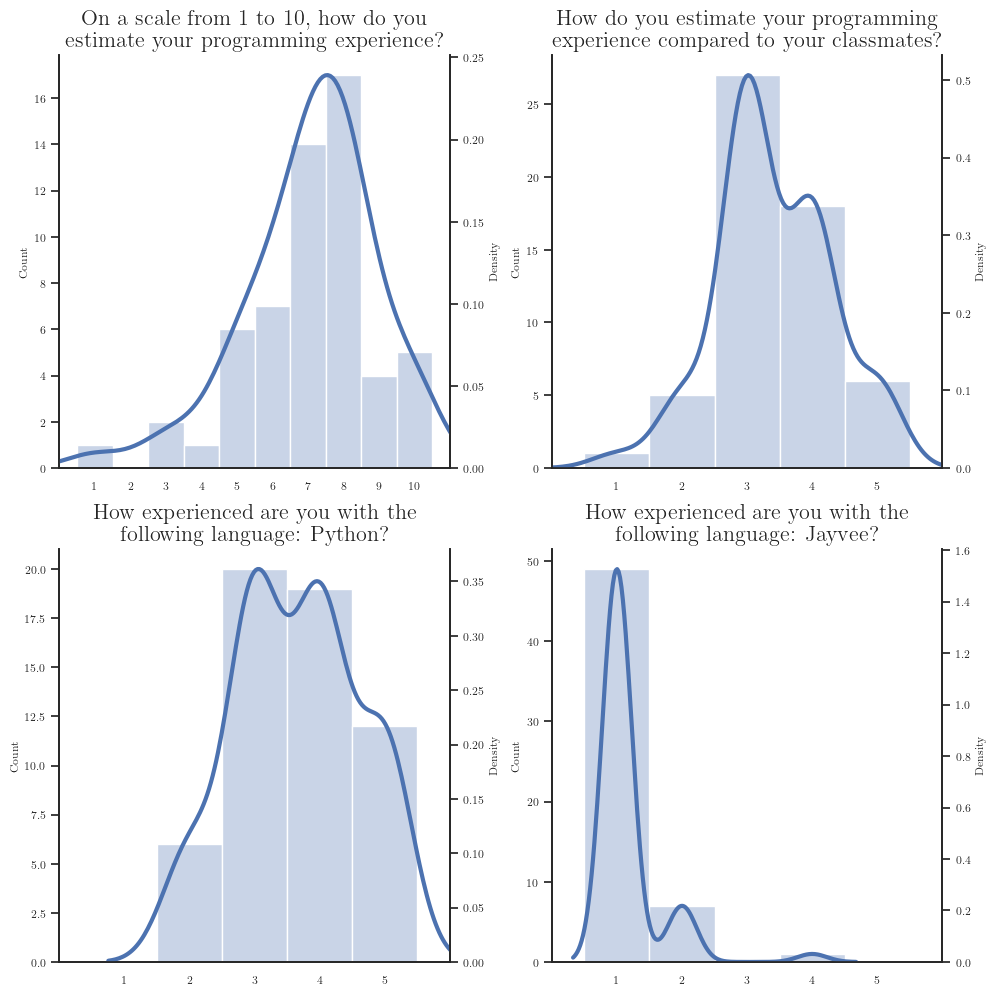

In [4]:
import pandas as pd

df = pd.read_csv('./data/generated/results_anon.csv', dtype = {'student_id_anon':str})

def createHist(dataFrame, ax, question: str, max: int, title: str):
    ax2 = ax.twinx()

    sns.kdeplot(
            dataFrame,
            x=question,
            ax=ax2,
            common_norm=False,
            linewidth=3,
            legend=False
        )

    sns.histplot(
        data=dataFrame,
        x=question,
        ax=ax,
        #multiple='stack',
        element='bars',
        #palette=colors,
        #hue='Group',
        legend=False,
        #kde=True,
        discrete=True,
        #shrink=0.8,
        alpha=0.3
    )

    ax.set_title(title, size = 16)
    ax.set_xlabel("")
    ax.set_xticks(range(1, max + 1))

    ax.set_xlim(0, max + 1)

    sns.despine(right=False)

    return [ax, ax2]

def createSurveyPlot(dataFrame):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

    ax1 = createHist(dataFrame, ax1, 'ex_prog', 10, 'On a scale from 1 to 10, how do you\nestimate your programming experience?')
    ax2 = createHist(dataFrame, ax2, 'ex_class', 5, 'How do you estimate your programming\nexperience compared to your classmates?')
    ax3 = createHist(dataFrame, ax3, 'ex_PY', 5, 'How experienced are you with the\nfollowing language: Python?')
    ax4 = createHist(dataFrame, ax4, 'ex_JV', 5, 'How experienced are you with the\nfollowing language: Jayvee?')

    fig.tight_layout()

    return plt

courseEntryPlot = createSurveyPlot(df)

courseEntryPlot.show()

## Test for normality

In [5]:
df = pd.read_csv('./data/generated/results_anon.csv', dtype = {'student_id_anon':str})

pg.normality(df).round(3)

,W,pval,normal
t1_time,0.899,0.000,False
t1_correctness,0.733,0.000,False
t2_time,0.865,0.000,False
t2_correctness,0.726,0.000,False
jv_time,0.897,0.000,False
py_time,0.872,0.000,False
jv_correctness,0.609,0.000,False
py_correctness,0.822,0.000,False
ex_prog,0.923,0.001,False
ex_class,0.875,0.000,False


# Time

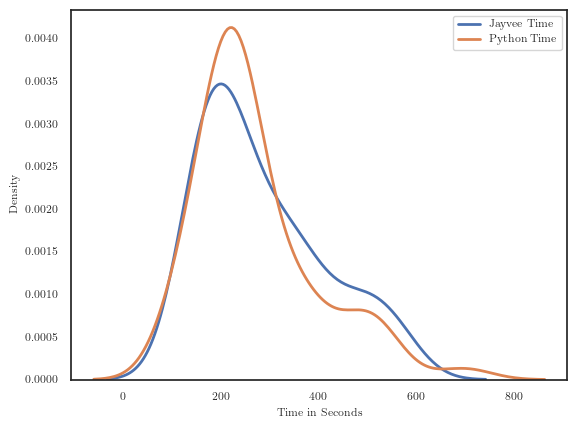

In [6]:
df = pd.read_csv('./data/generated/results_anon.csv', dtype = {'student_id_anon':str})

sns.kdeplot(
    data=df,
    x="jv_time",
    label="Jayvee Time",
    common_norm=False,
    linewidth=2
)

sns.kdeplot(
    data=df,
    x="py_time",
    label="Python Time",
    common_norm=False,
    linewidth=2
)

plt.xlabel('Time in Seconds')

plt.legend()

plt.show()

In [7]:
df = pd.read_csv('./data/generated/results_anon.csv', dtype = {'student_id_anon':str})

print(f'n = {df.shape[0]}')
print(f'Mdn_{{jv}} = {df["jv_time"].median()}')
print(f'Mdn_{{py}} = {df["py_time"].median()}')

n = 57
Mdn_{jv} = 252.368
Mdn_{py} = 234.227


In [8]:
df = pd.read_csv('./data/generated/results_anon.csv', dtype = {'student_id_anon':str})

test = pg.wilcoxon(df['jv_time'], df['py_time'], alternative='less')

# Manually patched, see https://github.com/raphaelvallat/pingouin/issues/456
print(rbc(df['jv_time'], df['py_time'], 'less'))

test

-0.09255898366606169


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,903.0,less,0.729659,0.092559,0.476762


# Correctness

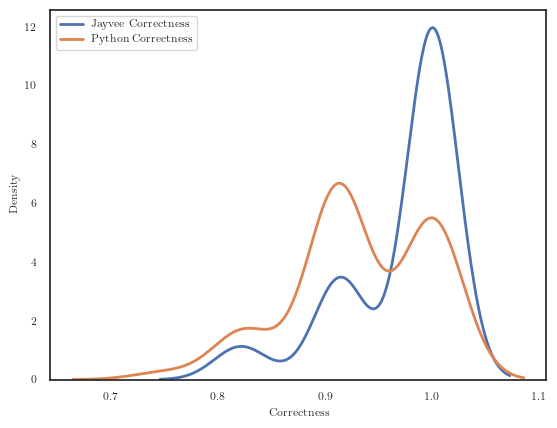

In [9]:
df = pd.read_csv('./data/generated/results_anon.csv', dtype = {'student_id_anon':str})

sns.kdeplot(
    data=df,
    x="jv_correctness",
    label="Jayvee Correctness",
    common_norm=False,
    linewidth=2
)

sns.kdeplot(
    data=df,
    x="py_correctness",
    label="Python Correctness",
    common_norm=False,
    linewidth=2
)

plt.xlabel('Correctness')

plt.legend()

plt.show()

In [10]:
df = pd.read_csv('./data/generated/results_anon.csv', dtype = {'student_id_anon':str})

print(f'n = {df.shape[0]}')
print(f'Mdn_{{jv}} = {df["jv_correctness"].median()}')
print(f'Mdn_{{py}} = {df["py_correctness"].median()}')

n = 57
Mdn_{jv} = 1.0
Mdn_{py} = 0.9166666666666666


In [11]:
df = pd.read_csv('./data/generated/results_anon.csv', dtype = {'student_id_anon':str})

test = pg.wilcoxon(df['jv_correctness'], df['py_correctness'], alternative='greater')

test

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,637.0,greater,0.001097,0.553659,0.6739


# Difficulty

/Users/rhazn/development/projects/2025-data-release-program-comprehension-jayvee/.venv/lib/python3.11/site-packages/plot_likert/plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)


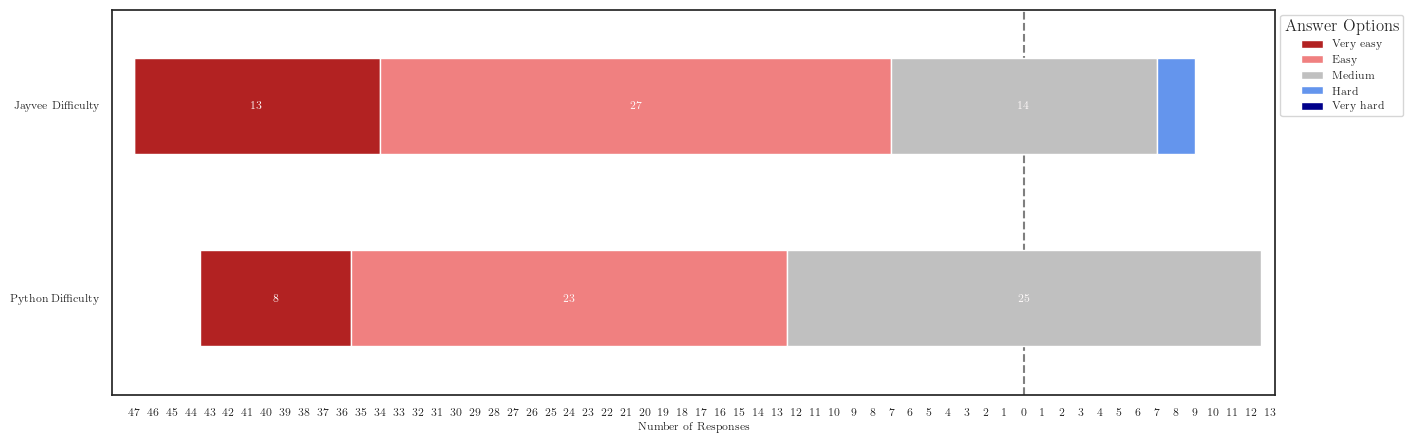

In [12]:
df = pd.read_csv('./data/generated/survey.csv')

answerOptions = [
    'Very easy',
    'Easy',
    'Medium',
    'Hard',
    'Very hard',
]

renamedDf = df[['difficultyJV', 'difficultyPY']].rename(columns={
    'difficultyJV': 'Jayvee Difficulty',
    'difficultyPY': 'Python Difficulty'
})

plot_likert.plot_likert(renamedDf, answerOptions, 
                        figsize=(15,5),
                        bar_labels=True,
                        bar_labels_color="snow",
                        colors=plot_likert.colors.default_with_darker_neutral
                       )

plt.legend(
    bbox_to_anchor=(1.0, 1),  # Adjust legend position
    loc='upper left',
    title="Answer Options"
)

plt.show()

In [13]:
df = pd.read_csv('./data/generated/survey.csv')

dfReplacedLikert = df[['difficultyJV', 'difficultyPY']].replace({
    'Very easy': 1,
    'Easy': 2,
    'Medium': 3,
    'Hard': 4,
    'Very hard': 5,
})

print(f'n = {df.shape[0]}')
print(f'Mdn_{{jv}} = {dfReplacedLikert["difficultyJV"].median()}')
print(f'Mdn_{{py}} = {dfReplacedLikert["difficultyPY"].median()}')

n = 56
Mdn_{jv} = 2.0
Mdn_{py} = 2.0


/var/folders/tq/ppy7x00d4kn0z3bgzscqy3mc0000gp/T/ipykernel_6795/874627725.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfReplacedLikert = df[['difficultyJV', 'difficultyPY']].replace({


In [14]:
test = pg.wilcoxon(dfReplacedLikert['difficultyJV'], dfReplacedLikert['difficultyPY'], alternative='less')

# Manually patched, see https://github.com/raphaelvallat/pingouin/issues/456
print(rbc(dfReplacedLikert['difficultyJV'], dfReplacedLikert['difficultyPY'], 'less'))

test

0.23131313131313136


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,380.5,less,0.076446,-0.231313,0.585619
